In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import tkinter as tk
from tkinter import filedialog
import time



In [2]:
# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [5]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
# Train the model
start_time = time.time()
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)
train_time = time.time() - start_time
print("Training time: ", train_time)




Epoch 1/15
750/750 [==============================] - 50s 64ms/step - loss: 0.5990 - accuracy: 0.7771 - val_loss: 0.4268 - val_accuracy: 0.8397
Epoch 2/15
750/750 [==============================] - 62s 83ms/step - loss: 0.3669 - accuracy: 0.8658 - val_loss: 0.3396 - val_accuracy: 0.8760
Epoch 3/15
750/750 [==============================] - 51s 68ms/step - loss: 0.3092 - accuracy: 0.8890 - val_loss: 0.3031 - val_accuracy: 0.8902
Epoch 4/15
750/750 [==============================] - 51s 68ms/step - loss: 0.2777 - accuracy: 0.8992 - val_loss: 0.2967 - val_accuracy: 0.8888
Epoch 5/15
750/750 [==============================] - 51s 68ms/step - loss: 0.2544 - accuracy: 0.9067 - val_loss: 0.2719 - val_accuracy: 0.9021
Epoch 6/15
750/750 [==============================] - 53s 71ms/step - loss: 0.2325 - accuracy: 0.9155 - val_loss: 0.2751 - val_accuracy: 0.9038
Epoch 7/15
750/750 [==============================] - 56s 75ms/step - loss: 0.2168 - accuracy: 0.9203 - val_loss: 0.2675 - val_accuracy:

In [8]:
def preprocess_and_predict_image(image_path):
    # Read and preprocess the image
    img = preprocess_image(image_path)
    # Predict the class and measure prediction time
    start_time = time.time()
    predictions = model.predict(img)
    pred_time = time.time() - start_time
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]  # Get the class name from class_labels
    return predicted_class, pred_time


def preprocess_image(image_path):
    # Load the image from the file path
    img = load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    # Convert the image to a NumPy array
    img_array = img_to_array(img)
    # Invert the grayscale values (black -> white, white -> black)
    img_array = 255 - img_array
    # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
    img_array = img_array.reshape((1, 28, 28, 1))
    # Normalize the pixel values to be between 0 and 1
    return img_array / 255.0


def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_class, pred_time = preprocess_and_predict_image(file_path)
        result_label.config(text=f"Predicted Class: {predicted_class}\nPrediction Time: {pred_time:.4f} seconds")




In [9]:
# Create a Tkinter window
root = tk.Tk()
root.title("Fashion MNIST Image Classifier")

# Create a button to browse the image
browse_button = tk.Button(root, text="Browse Image", command=browse_image)
browse_button.pack(pady=10)

# Label to display the predicted class
result_label = tk.Label(root, text="")
result_label.pack(pady=5)

# Start the Tkinter event loop
root.mainloop()


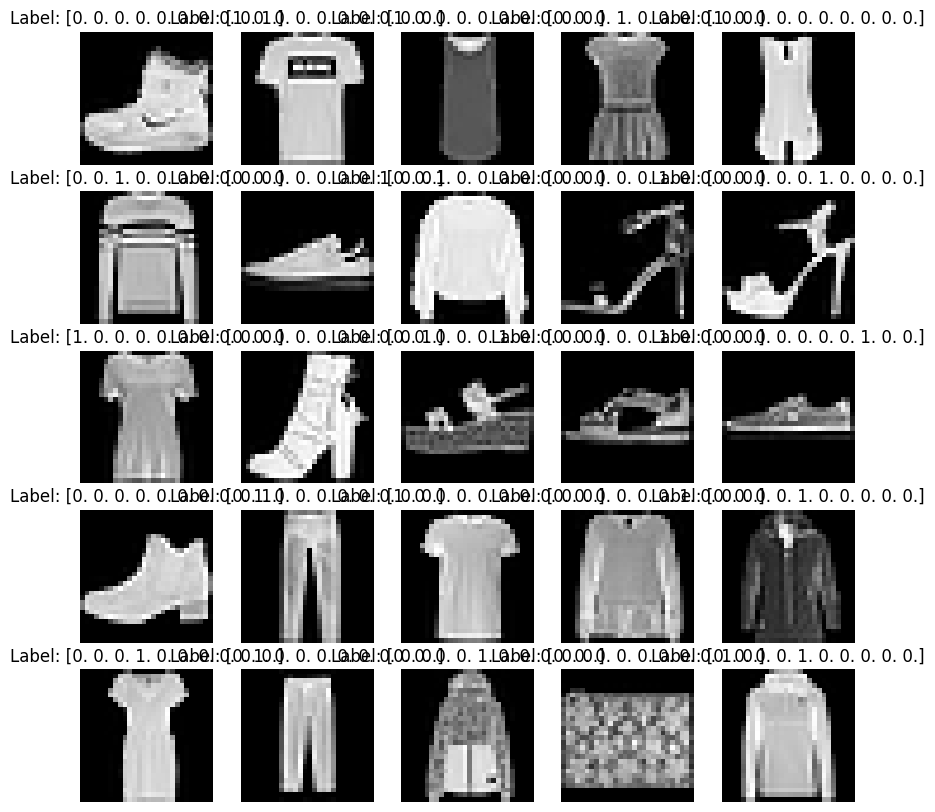

In [4]:
# Display some example images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')  # Display grayscale image
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()